<a href="https://colab.research.google.com/github/YehorChykin/HW_DS/blob/main/HW_DS_M5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт бібліотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv


Прочитайте отриману таблицю, використовуючи метод head

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DS_and_ML/2017_jun_final - 2017_jun_final.csv")
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

Визначте розмір таблиці за допомогою методу shape

In [ ]:
print(df.shape)

(8704, 25)


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [ ]:
print(df.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [ ]:
df.isnull().sum()/df.shape[0]

N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Спеціалізація                       0.829389
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.041131
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.025620
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [ ]:
df = df[['Мова програмування'] + list(df.dropna(axis=1, how='any').columns)]

Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [ ]:
df.isnull().sum()/df.shape[0]

Мова програмування                  0.442325
N                                   0.000000
Посада                              0.000000
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Ще студент                          0.000000
Рівень англійської                  0.000000
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [ ]:
df = df.dropna()

Визначте новий розмір таблиці за допомогою методу shape

In [ ]:
df.shape

(4854, 20)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [ ]:
python_data = df[df['Мова програмування'] == 'Python']

Визначте розмір таблиці python_data за допомогою методу shape

In [ ]:
python_data.shape

(207, 20)

Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [ ]:
grouped = python_data.groupby('Посада')

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [ ]:
aggregated_data = grouped['Зарплата на місяць'].agg(['min', 'max'])
print(aggregated_data)

                           min   max
Посада                              
Junior Software Engineer   100  1250
Senior Software Engineer  1300  9200
Software Engineer          500  5400
System Architect          3000  5000
Technical Lead            1425  6200


Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [ ]:
# В мене тут середня ЗП в місяць на посаді, взята я так розумію з середньої для даної посади
def fill_avg_salary(group):
    return group.mean()
grouped = df.groupby('Посада')
df['avg'] = grouped['Зарплата на місяць'].transform(fill_avg_salary)
df

,Мова програмування,N,Посада,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,...,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary,avg
2,C#/.NET,3,Software Engineer,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,...,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,1678.630074
3,JavaScript,4,Software Engineer,5,4,2000,400,Одеса,до 200 осіб,Продуктова,...,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,1678.630074
4,JavaScript,5,Senior Software Engineer,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,...,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,3243.200926
6,C#/.NET,7,Junior Software Engineer,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,...,23,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600,605.658594
7,C++,8,Senior Software Engineer,6,1,3300,500,Київ,до 10 осіб,Продуктова,...,28,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300,3243.200926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,Java,8693,Software Engineer,5,1,3500,650,Віддалено,до 200 осіб,Аутсорсингова,...,28,Вища,False,Intermediate (середній),12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500,1678.630074
8694,C#/.NET,8695,Junior Software Engineer,1,1,550,550,Харків,до 200 осіб,Аутсорсингова,...,23,Вища,False,Pre-intermediate (нище середнього),12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550,605.658594
8695,Python,8696,Software Engineer,1,0.5,1500,1000,Київ,до 10 осіб,Стартап,...,29,Вища,False,Intermediate (середній),12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500,1678.630074
8701,Ruby/Rails,8702,Junior Software Engineer,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,...,30,Неповна Вища,False,Upper-Intermediate (вище середнього),12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,605.658594


Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [ ]:
print(df['avg'].describe())

count    4854.000000
mean     1883.371034
std      1056.802546
min       457.000000
25%       605.658594
50%      1678.630074
75%      3243.200926
max      7000.000000
Name: avg, dtype: float64


Збережіть отриману таблицю в CSV файл

In [ ]:
df.to_csv("/content/drive/MyDrive/DS_and_ML/HW_M5_2_csv.csv", index=False)

Додаткові графіки:

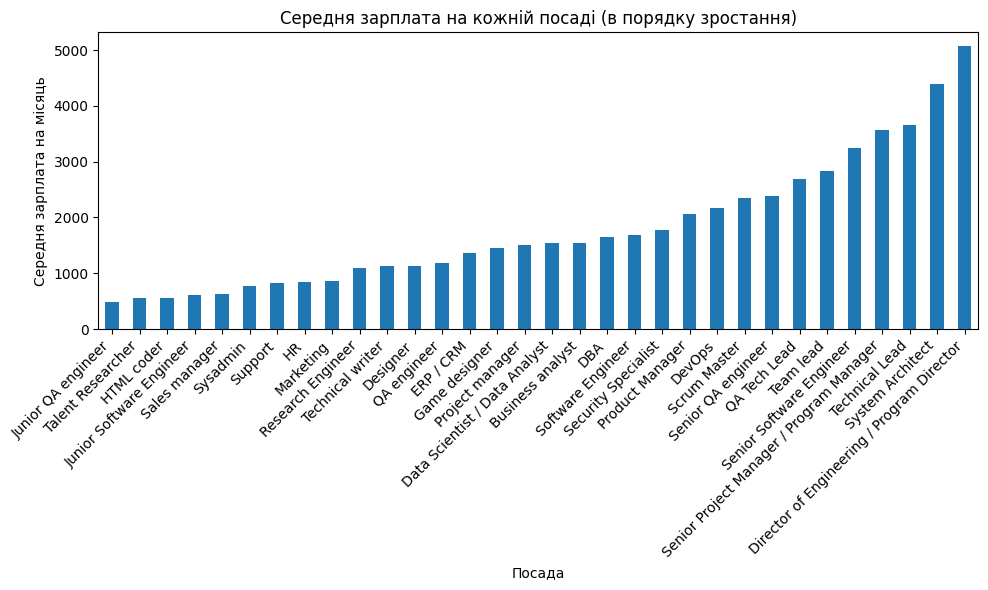

In [11]:
mean_salary_by_position = df.groupby('Посада')['Зарплата на місяць'].mean()
mean_salary_by_position_sorted = mean_salary_by_position.sort_values()
plt.figure(figsize=(10, 6))
mean_salary_by_position_sorted.plot(kind='bar')
plt.xlabel('Посада')
plt.ylabel('Середня зарплата на місяць')
plt.title('Середня зарплата на кожній посаді (в порядку зростання)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


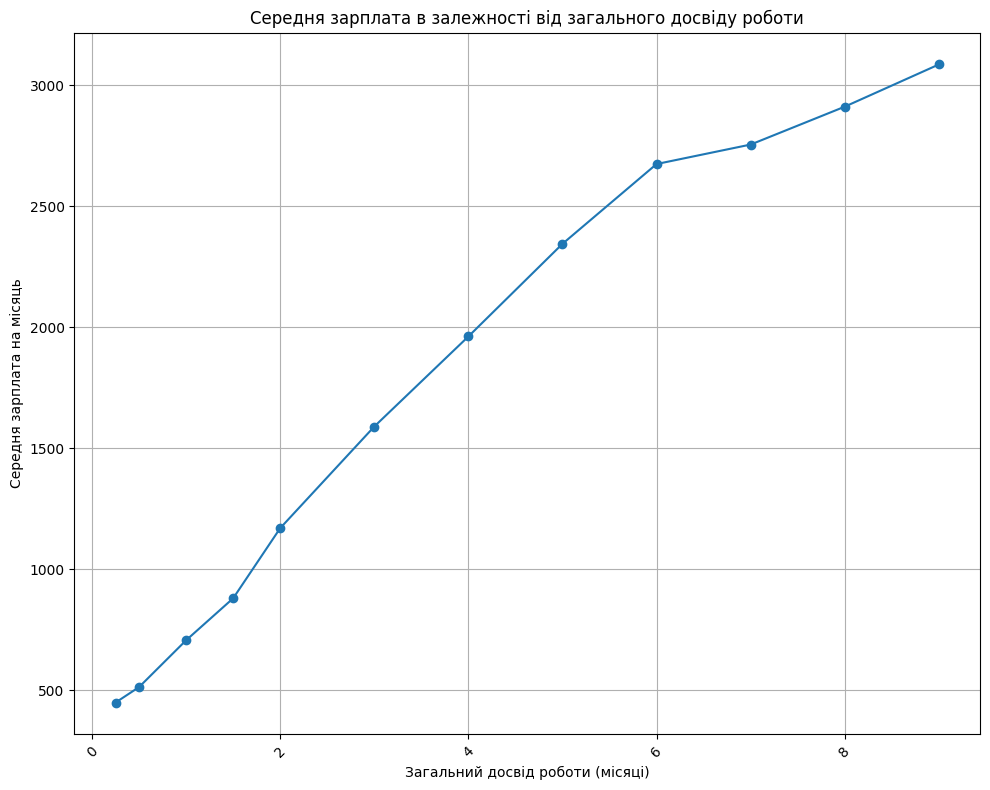

In [15]:
df['Загальний досвід роботи'] = pd.to_numeric(df['Загальний досвід роботи'], errors='coerce')
mean_salary_by_experience = df.groupby('Загальний досвід роботи')['Зарплата на місяць'].mean()
plt.figure(figsize=(10, 8))
mean_salary_by_experience.plot(kind='line', marker='o')
plt.xlabel('Загальний досвід роботи (місяці)')
plt.ylabel('Середня зарплата на місяць')
plt.title('Середня зарплата в залежності від загального досвіду роботи')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


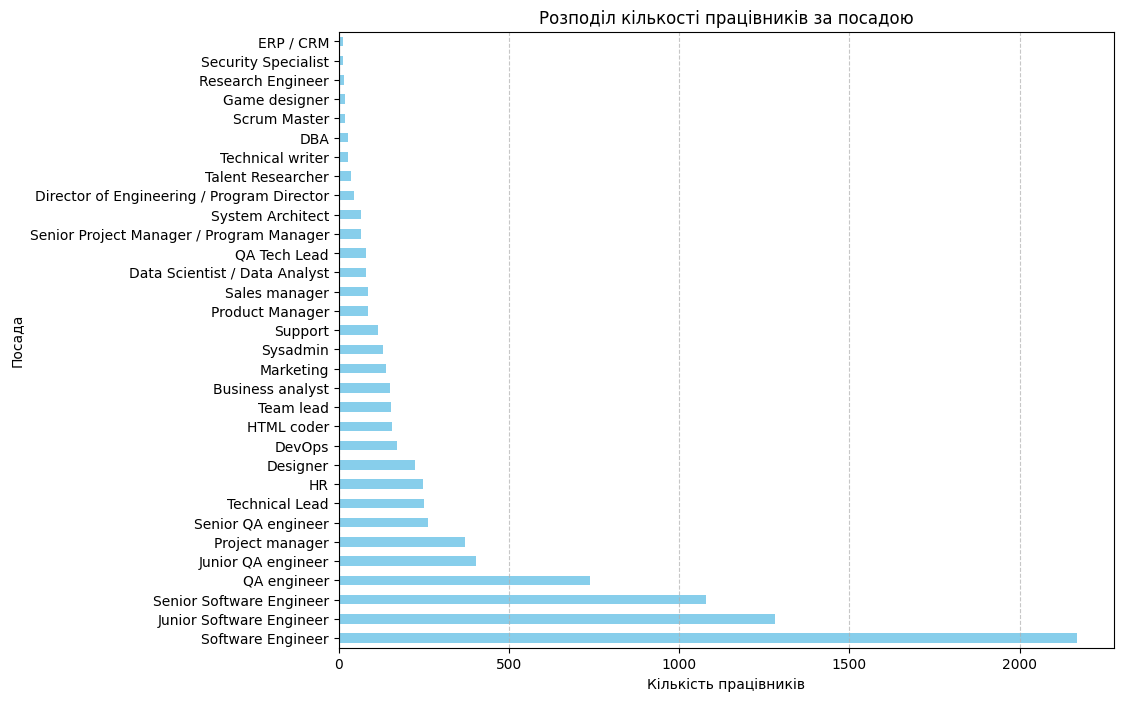

In [16]:
positions = df['Посада'].value_counts()

plt.figure(figsize=(10, 8))
positions.plot(kind='barh', color='skyblue')
plt.xlabel('Кількість працівників')
plt.ylabel('Посада')
plt.title('Розподіл кількості працівників за посадою')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

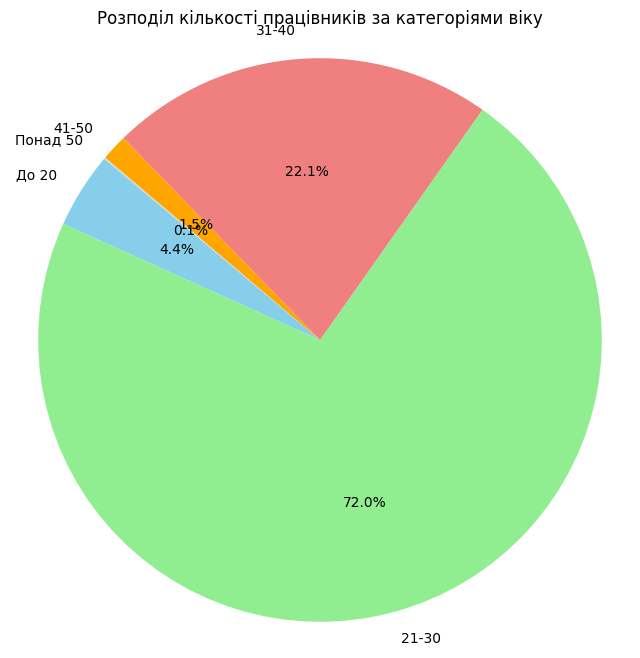

In [19]:
categories = ['До 20', '21-30', '31-40', '41-50', 'Понад 50']
counts = [sum(df['Вік'] <= 20),
          sum((df['Вік'] >= 21) & (df['Вік'] <= 30)),
          sum((df['Вік'] >= 31) & (df['Вік'] <= 40)),
          sum((df['Вік'] >= 41) & (df['Вік'] <= 50)),
          sum(df['Вік'] > 50)]
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightgrey'])
plt.title('Розподіл кількості працівників за категоріями віку')
plt.axis('equal')
plt.show()